In [62]:
#### INSTALLATION OF LIBRARIES
!sudo apt update
!sudo apt install openjdk-17-jdk -y
#!curl -JLO 'https://apache.osuosl.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz'
!tar xvf spark-3.3.1-bin-hadoop3.tgz
!mv spark-3.3.1-bin-hadoop3 /opt/spark
!pip install pyspark missingno findspark plotly wandb koalas

Get:1 https://deb.nodesource.com/node_16.x focal InRelease [4583 B]
Get:2 https://deb.nodesource.com/node_16.x focal/main amd64 Packages [774 B]   
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB] 
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 Packages [29.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]            
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:8 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB] 
Get:9 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB] 
Get:11 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [30.2 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [63]:
#### LIBRARIES
import os
os.environ["JAVA_HOME"] = "/usr"
os.environ["SPARK_HOME"] = "/opt/spark"
#### BASIC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### SPARK
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pyspark.pandas as ps
import databricks.koalas as ks
spark = SparkSession.builder.master("local[*]").getOrCreate()

#### SETTINGS
%matplotlib inline
spark.sparkContext.setLogLevel("OFF")
ps.options.plotting.backend = 'matplotlib'

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/30 12:03:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [65]:
checkin = ks.read_json('./data/checkin.json', lines=True)
review = ks.read_json('./data/review.json', lines=True)
business = ks.read_json('./data/business.json', lines=True)
tip = ks.read_json('./data/tip.json', lines=True)

In [66]:
ks.sql('''
    select count(distinct(business_id)) as business_count
    from {review}
    where business_id in (select business_id from {popular_brands_ids})
''')

ValueError: The key popular_brands_ids in the SQL statement was not found in global, local or parameters variables

In [96]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"1616 Chapala St, Ste 2","(None, None, None, None, None, None, None, Non...",Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,None,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,87 Grasso Plaza Shopping Center,"(None, None, None, None, None, None, None, Non...",mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"(8:0-18:30, 0:0-0:0, 8:0-14:0, None, 8:0-18:30...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO
2,5255 E Broadway Blvd,"(None, None, None, None, None, None, None, Tru...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"(8:0-23:0, 8:0-22:0, 8:0-23:0, 8:0-22:0, 8:0-2...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ
3,935 Race St,"(None, None, u'none', None, None, None, None, ...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"(7:0-21:0, 7:0-20:0, 7:0-21:0, 7:0-21:0, 7:0-2...",1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA
4,101 Walnut St,"(None, None, None, None, None, None, None, Tru...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"(12:0-22:0, None, 12:0-22:0, 12:0-18:0, 16:0-2...",1,40.338183,-75.471659,Perkiomen Valley Brewery,18054,13,4.5,PA


In [67]:
popular_brands_names = ks.sql("select count(*), name from {business} group by name order by 1 desc limit 20")

In [68]:
popular_brands_ids = ks.sql('''
select business_id
from {business}
where name in (select name from {popular_brands_names})
''')

In [56]:
checkin_popular = ks.sql('''
select *
from {checkin}
where business_id in (select business_id from {popular_brands_ids})
''')

In [60]:
tip_popular = ks.sql('''
select business_id, date
from {tip}
where business_id in (select business_id from {popular_brands_ids})
''')

In [62]:
review_popular = ks.sql('''
select business_id, date
from {review}
where business_id in (select business_id from {popular_brands_ids})
''')

In [85]:
review_popular.shape

(133399, 2)

In [67]:
checkin_popular.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 6492 entries, 0 to 6491
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  6492 non-null   object
 1   date         6492 non-null   object
dtypes: object(2)

In [68]:
checkin_popular_spark = checkin_popular.to_spark()

In [72]:
from pyspark.sql.functions import split, col
checkin_popular_spark_2 = checkin_popular_spark.select(split(col("date"),",").alias("date_array"),col("business_id"))
checkin_popular_spark_2.show()

+--------------------+--------------------+
|          date_array|         business_id|
+--------------------+--------------------+
|[2011-07-29 16:37...|--lqIzK-ZVTtgwiQM...|
|[2011-06-06 00:37...|-1zRvh3yjKAa2eYgg...|
|[2010-10-25 05:37...|-2BDt9OdGiBONysWC...|
|[2012-06-02 21:05...|-2CPhK6ik9ZBgFX_F...|
|[2011-09-23 18:00...|-2mctVTqFR5-DDCXK...|
|[2016-08-17 19:46...|-3725FZiIIYdwQtM4...|
|[2011-03-26 01:57...|-3Xl8nSBSjaPpftsS...|
|[2011-05-09 12:13...|-3dkEoYgH8AlUtBMZ...|
|[2012-01-05 05:16...|-6E_cla4lotruNasI...|
|[2010-06-14 03:35...|-6MEKOmFu6jckT3pr...|
|[2010-02-13 16:06...|-6kIZWnXPuDC6JiQJ...|
|[2010-03-27 16:44...|-6xYpkvG91ClVz31J...|
|[2010-07-27 20:24...|-7Rx5jVeQmlVoAU_o...|
|[2010-11-11 17:57...|-7UDKbg_8TL4LVuYR...|
|[2011-10-24 15:18...|-7_Wl2UGiuA7I5Lh0...|
|[2010-09-05 16:47...|-85kJMtb9wqNWDT8y...|
|[2010-07-22 17:48...|-8wGpH3gYkwHKLcpc...|
|[2012-05-30 15:36...|-99CauTgdResVER5N...|
|[2010-08-31 00:40...|-9yzQQ0d_rcOD2Czd...|
|[2010-07-23 22:51...|-A-5spZpPM

In [75]:
from pyspark.sql.functions import explode
# using select function applying
# explode on array column
checkin_popular_spark_3 = checkin_popular_spark_2.select(checkin_popular_spark_2.business_id,explode(checkin_popular_spark_2.date_array))
 
# printing the schema of the df2
checkin_popular_spark_3.printSchema()
 
# show df2
checkin_popular_spark_3.show()

root
 |-- business_id: string (nullable = true)
 |-- col: string (nullable = false)

+--------------------+--------------------+
|         business_id|                 col|
+--------------------+--------------------+
|--lqIzK-ZVTtgwiQM...| 2011-07-29 16:37:02|
|--lqIzK-ZVTtgwiQM...| 2011-10-24 16:00:29|
|--lqIzK-ZVTtgwiQM...| 2012-10-27 19:17:50|
|--lqIzK-ZVTtgwiQM...| 2013-05-13 22:03:28|
|--lqIzK-ZVTtgwiQM...| 2013-05-14 21:25:02|
|--lqIzK-ZVTtgwiQM...| 2013-05-28 22:18:02|
|--lqIzK-ZVTtgwiQM...| 2014-12-08 17:31:29|
|--lqIzK-ZVTtgwiQM...| 2015-03-02 18:41:47|
|--lqIzK-ZVTtgwiQM...| 2016-01-15 17:49:03|
|--lqIzK-ZVTtgwiQM...| 2016-03-06 16:55:09|
|--lqIzK-ZVTtgwiQM...| 2016-07-06 20:40:56|
|--lqIzK-ZVTtgwiQM...| 2017-03-09 02:16:11|
|--lqIzK-ZVTtgwiQM...| 2017-04-25 22:19:12|
|--lqIzK-ZVTtgwiQM...| 2017-09-25 15:09:54|
|--lqIzK-ZVTtgwiQM...| 2019-01-07 17:39:16|
|--lqIzK-ZVTtgwiQM...| 2019-05-30 22:26:48|
|--lqIzK-ZVTtgwiQM...| 2019-07-22 16:12:14|
|--lqIzK-ZVTtgwiQM...| 2019-09-07 2

In [76]:
checkin_popular_normalized = checkin_popular_spark_3.to_koalas()

In [86]:
checkin_popular_normalized.head(1)

,business_id,col
0,--lqIzK-ZVTtgwiQM63XgQ,2011-07-29 16:37:02


In [87]:
checkin_popular_normalized['date'] = ks.to_datetime(checkin_popular_normalized['col'], format='%Y-%m-%d %H:%M:%S')
checkin_popular_normalized = checkin_popular_normalized.drop('col', axis=1)
checkin_popular_normalized.head(1)

/opt/spark/python/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


,business_id,date
0,--lqIzK-ZVTtgwiQM63XgQ,2011-07-29 16:37:02


In [89]:
review_popular['date'] = ks.to_datetime(review_popular['date'], format='%Y-%m-%d %H:%M:%S')

/opt/spark/python/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [91]:
tip_popular['date'] = ks.to_datetime(tip_popular['date'], format='%Y-%m-%d %H:%M:%S')

/opt/spark/python/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [92]:
checkin_p = checkin_popular_normalized.to_pandas()
review_p = review_popular.to_pandas()
tip_p = tip_popular.to_pandas()

In [93]:
checkin_p.to_csv('./data/checkin_timeseries.csv', index=False)
review_p.to_csv('./data/review_timeseries.csv', index=False)
tip_p.to_csv('./data/tip_timeseries.csv', index=False)

In [2]:
import pandas as pd
checkin_p = pd.read_csv('../data/checkin_timeseries.csv', parse_dates=['date'])
review_p = pd.read_csv('../data/review_timeseries.csv', parse_dates=['date'])
tip_p = pd.read_csv('../data/tip_timeseries.csv', parse_dates=['date'])

In [3]:
checkin_p['m_y'] = checkin_p['date'].apply(lambda x: "%d/%d" % (x.month, x.year))
checkin_p = pd.DataFrame(checkin_p.groupby(['m_y', 'business_id']).size())
checkin_p['data'] = checkin_p.index
checkin_p['month'] = checkin_p['data'].apply(lambda x: x[0])
checkin_p['business_id'] = checkin_p['data'].apply(lambda x: x[1])
checkin_p = checkin_p.drop('data', axis=1)
checkin_p = checkin_p.reset_index(drop=True)
checkin_p = checkin_p.rename(columns={0: 'count'})
checkin_p.head()

,count,month,business_id
0,1,1/2010,29ThPh6IA69V-SfcwfV9Dg
1,1,1/2010,2Kqq7D6oj4FNF_9JmVjQJw
2,1,1/2010,2kt2oK-zgshowfiV3ZQl0Q
3,2,1/2010,48hwr-F1xEFfHdTD1ueE2A
4,2,1/2010,6EskDOVYwOFPYHYt7SY-DQ


In [4]:
review_p['m_y'] = review_p['date'].apply(lambda x: "%d/%d" % (x.month, x.year))
review_p = pd.DataFrame(review_p.groupby(['m_y', 'business_id']).size())
review_p['data'] = review_p.index
review_p['month'] = review_p['data'].apply(lambda x: x[0])
review_p['business_id'] = review_p['data'].apply(lambda x: x[1])
review_p = review_p.drop('data', axis=1)
review_p = review_p.reset_index(drop=True)
review_p = review_p.rename(columns={0: 'count'})
review_p.head()

,count,month,business_id
0,1,1/2006,3yyRANNTMIyS2jgGHeEzxA
1,1,1/2006,K2G-FsUMEV1gqWsLWsKzGQ
2,1,1/2006,aT0FhdLMRjUkJjjANFz7ZA
3,1,1/2007,1sZKO790Q6C4aV9PKmtWeA
4,1,1/2007,JyYT5phFLg3BESNL-WXf4Q


In [5]:
tip_p['m_y'] = tip_p['date'].apply(lambda x: "%d/%d" % (x.month, x.year))
tip_p = pd.DataFrame(tip_p.groupby(['m_y', 'business_id']).size())
tip_p['data'] = tip_p.index
tip_p['month'] = tip_p['data'].apply(lambda x: x[0])
tip_p['business_id'] = tip_p['data'].apply(lambda x: x[1])
tip_p = tip_p.drop('data', axis=1)
tip_p = tip_p.reset_index(drop=True)
tip_p = tip_p.rename(columns={0: 'count'})
tip_p.head()

,count,month,business_id
0,1,1/2010,2zSQu6_cLgWAVbZ2LbSLBA
1,1,1/2010,4bM_dsAYj4AxYL9NjVrp7A
2,1,1/2010,6EskDOVYwOFPYHYt7SY-DQ
3,2,1/2010,OPhWuFj83RDS9O1qU21X8Q
4,1,1/2010,WRh6AOkXFl1qtnlCYUUQ6Q


In [6]:
print(checkin_p.shape)
print(review_p.shape)
print(tip_p.shape)

(192996, 3)
(110083, 3)
(21724, 3)


In [61]:
full_count = pd.merge(checkin_p, review_p, on=['month', 'business_id'], how='outer')
full_count = pd.merge(full_count, tip_p, on=['month', 'business_id'], how='outer')
full_count = full_count.fillna(0)
full_count['total'] = full_count['count_x'] + full_count['count_y'] + full_count['count']
full_count = full_count.drop(['count_x', 'count_y', 'count'], axis=1)
full_count.head()

,month,business_id,total
0,1/2010,29ThPh6IA69V-SfcwfV9Dg,1.0
1,1/2010,2Kqq7D6oj4FNF_9JmVjQJw,1.0
2,1/2010,2kt2oK-zgshowfiV3ZQl0Q,1.0
3,1/2010,48hwr-F1xEFfHdTD1ueE2A,2.0
4,1/2010,6EskDOVYwOFPYHYt7SY-DQ,3.0


In [69]:
full_count.to_csv('./data/full_count.csv', index=False)

In [70]:
full_count_k = ks.from_pandas(full_count)

In [73]:
popular_brands_ids_and_names = ks.sql('''
select business_id, name
from {business}
where name in (select name from {popular_brands_names})
''')

In [76]:
final_table = ks.sql('''
select month, name, sum(total) as total
from {full_count_k}
join {popular_brands_ids_and_names} on {full_count_k}.business_id = {popular_brands_ids_and_names}.business_id
group by month, name
order by name, month
''')

In [78]:
final_table_pandas = final_table.to_pandas()

In [80]:
final_table_pandas.to_csv('./data/final_table_for_forecasting.csv', index=False)

In [81]:
final_table_pandas['month'] = pd.to_datetime(final_table_pandas['month'], format='%m/%Y')

In [ ]:
final_table_pandas.set_index('month', inplace=True)

In [82]:
final_table_pandas

,month,name,total
0,2009-01-01,Burger King,2.0
1,2010-01-01,Burger King,7.0
2,2011-01-01,Burger King,33.0
3,2012-01-01,Burger King,79.0
4,2013-01-01,Burger King,130.0
...,...,...,...
3359,2017-09-01,Wendy's,130.0
3360,2018-09-01,Wendy's,149.0
3361,2019-09-01,Wendy's,171.0
3362,2020-09-01,Wendy's,134.0


In [104]:
final_table_pandas.groupby('name').agg({'total': 'sum'}).sort_values(by='total', ascending=False)

,total
name,
Starbucks,229914.0
McDonald's,59882.0
Wawa,48561.0
Dunkin',46448.0
Chick-fil-A,41966.0
Walgreens,34151.0
CVS Pharmacy,28599.0
Taco Bell,25736.0
Wendy's,18853.0


In [109]:
real_final_table = final_table_pandas.pivot_table(index='month', columns='name', values='total')

In [111]:
real_final_table.to_csv('./data/forecasting.csv')

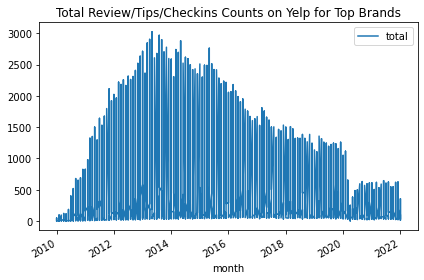

In [119]:
import matplotlib.pyplot as plt
final_table_pandas['2010-01-01':].plot(title = 'Total Review/Tips/Checkins Counts on Yelp for Top Brands')
plt.tight_layout()
plt.show()